## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
# Import Libraries
# 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import sys
import plotly.express as px
%matplotlib inline

In [2]:
# Load Data
data = pd.read_csv('./Telecom Churn.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Dataset Size and shape
data.shape

(3333, 20)

* Number of Rows: 3333
* Number of Columns: 20

## Exploring Data

In [4]:
# Data type of each Feature
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [5]:
#checking info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
# Checking statistics part of our data such as mean,standard deviation
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


from the statistics part of our data i can observe
* Maximum calls are at Night
* We have very few International call 
* Customer Service calls on an average are less which is a good sign 
* avg total time spend on calls in even is highest compare to night and day
* international call , mins and cost is very less compared to other calls

In [7]:
# data[['Total day minutes','Total eve minutes','Total night minutes', 'Total intl calls']].describe().T

In [8]:
data.describe(include=['O','bool']).T

,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411
Churn,3333,2,False,2850


In [9]:
# Count of unique values in each column
data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [10]:
# finding the missing values in the dataset

data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

* we can observe that the data has NO MISSING DATA involved

In [11]:
# Find Duplicate values in the dataset
data.duplicated().sum()

0

* There is no Duplicate Data in our dataset

<AxesSubplot:>

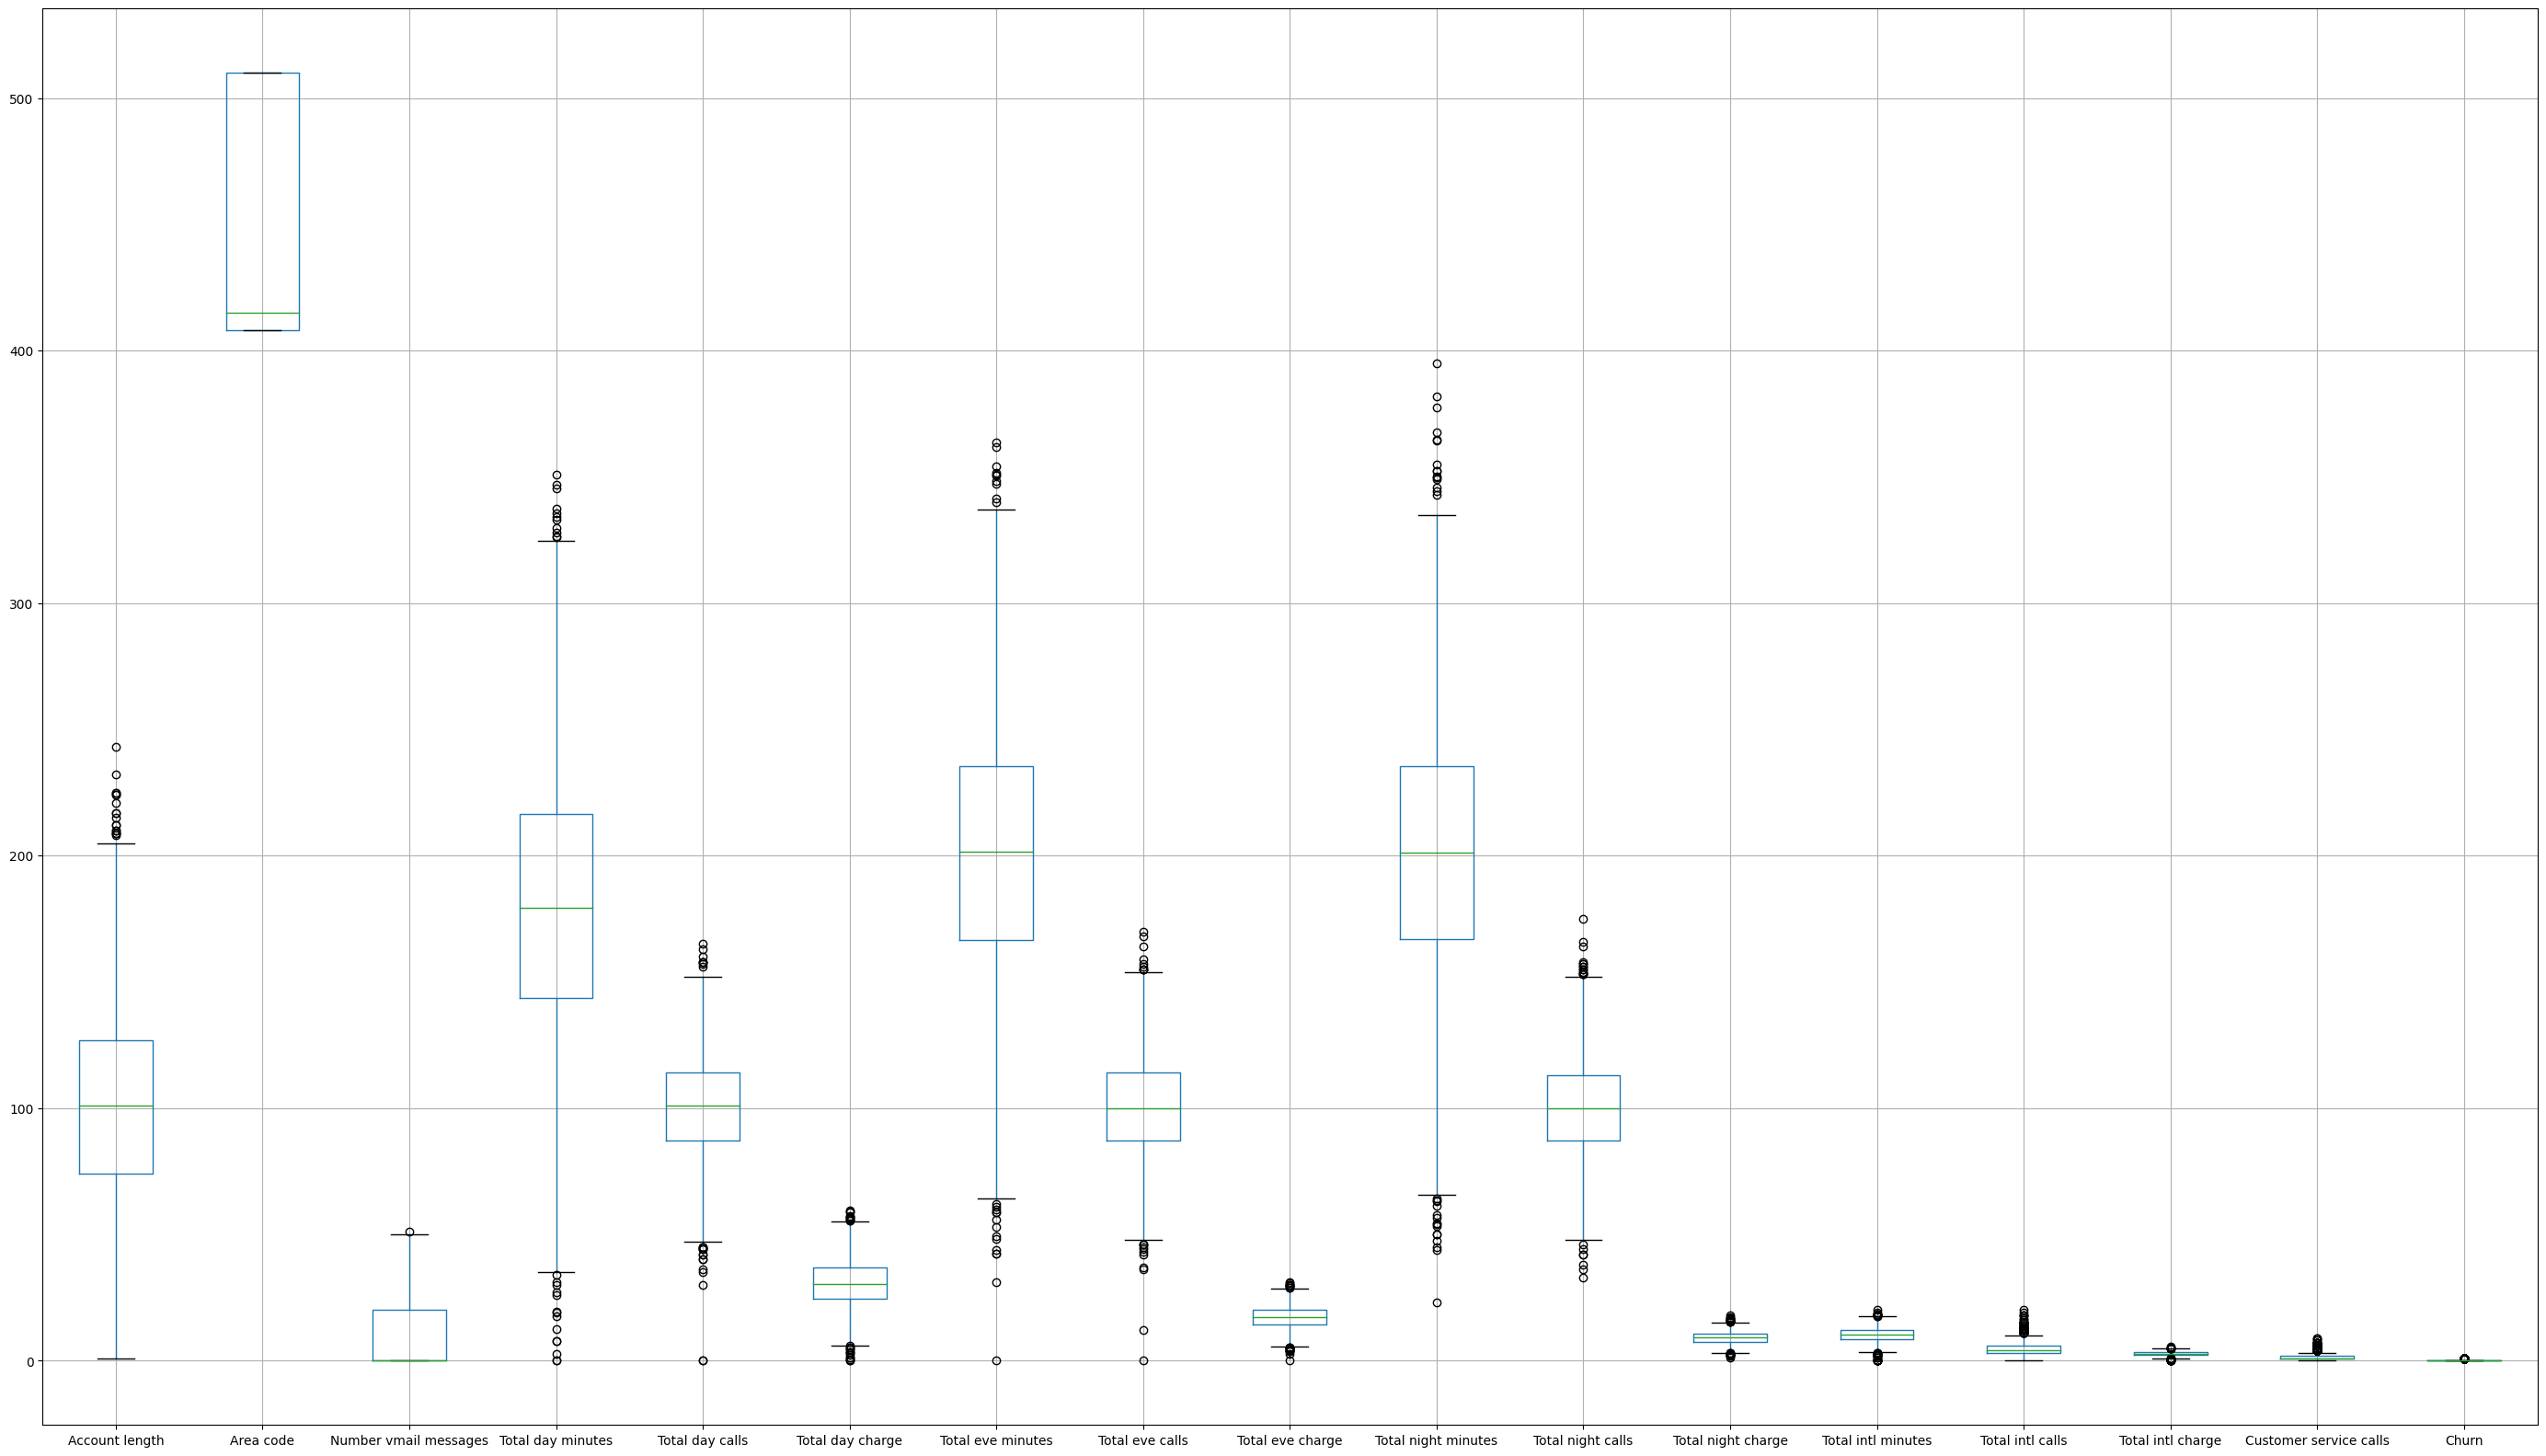

In [12]:
# Finding Outliers in our dataset using BoxPlot

data.boxplot(figsize=(35,20))


In [13]:
def find_outliers(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)
    IQR = Q3-Q1
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    outlier_list=((df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)).tolist()
    outlier_indexes=[i for i, x in enumerate(outlier_list) if x]
    return outlier_indexes
#----------------------
bad_indexes=[]
for col in data.columns:
    if data[col].dtype in ["int64", "float64"]:
        outlierindexes= find_outliers(data, col)
        bad_indexes.extend(outlierindexes)
print(f"All Bad indexes:{bad_indexes}")   

All Bad indexes:[197, 238, 309, 416, 817, 1045, 1093, 1387, 1408, 1551, 1751, 1886, 2150, 2259, 2277, 2700, 3216, 3227, 845, 2716, 2887, 15, 156, 197, 365, 605, 685, 741, 975, 985, 1052, 1076, 1345, 1397, 1621, 1679, 1986, 2028, 2124, 2252, 2412, 2594, 2736, 2753, 3046, 3174, 315, 468, 692, 740, 1057, 1121, 1144, 1322, 1345, 1346, 1397, 1422, 1460, 1869, 1989, 2217, 2392, 2394, 2492, 2884, 2885, 2964, 3187, 15, 156, 197, 365, 605, 685, 741, 975, 985, 1052, 1076, 1345, 1397, 1621, 1679, 1986, 2028, 2124, 2252, 2412, 2594, 2736, 2753, 3046, 3174, 3, 6, 8, 32, 302, 533, 580, 587, 821, 850, 889, 893, 1054, 1190, 1233, 1335, 1601, 1960, 2160, 2331, 2551, 2732, 2932, 3075, 58, 154, 301, 475, 646, 960, 1020, 1071, 1266, 1615, 1706, 1730, 1856, 2227, 2592, 2853, 2932, 3121, 3157, 3219, 3, 6, 8, 32, 302, 533, 580, 587, 821, 850, 889, 893, 1054, 1190, 1233, 1335, 1601, 1960, 2160, 2331, 2551, 2732, 2932, 3075, 116, 244, 444, 862, 883, 918, 922, 992, 999, 1072, 1113, 1202, 1238, 1260, 1313, 1317,

In [14]:
def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)

import numpy as np
bad_indexes = []
for col in data.columns:
    if data[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_outliers(data[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))
print(len(bad_indexes))

529


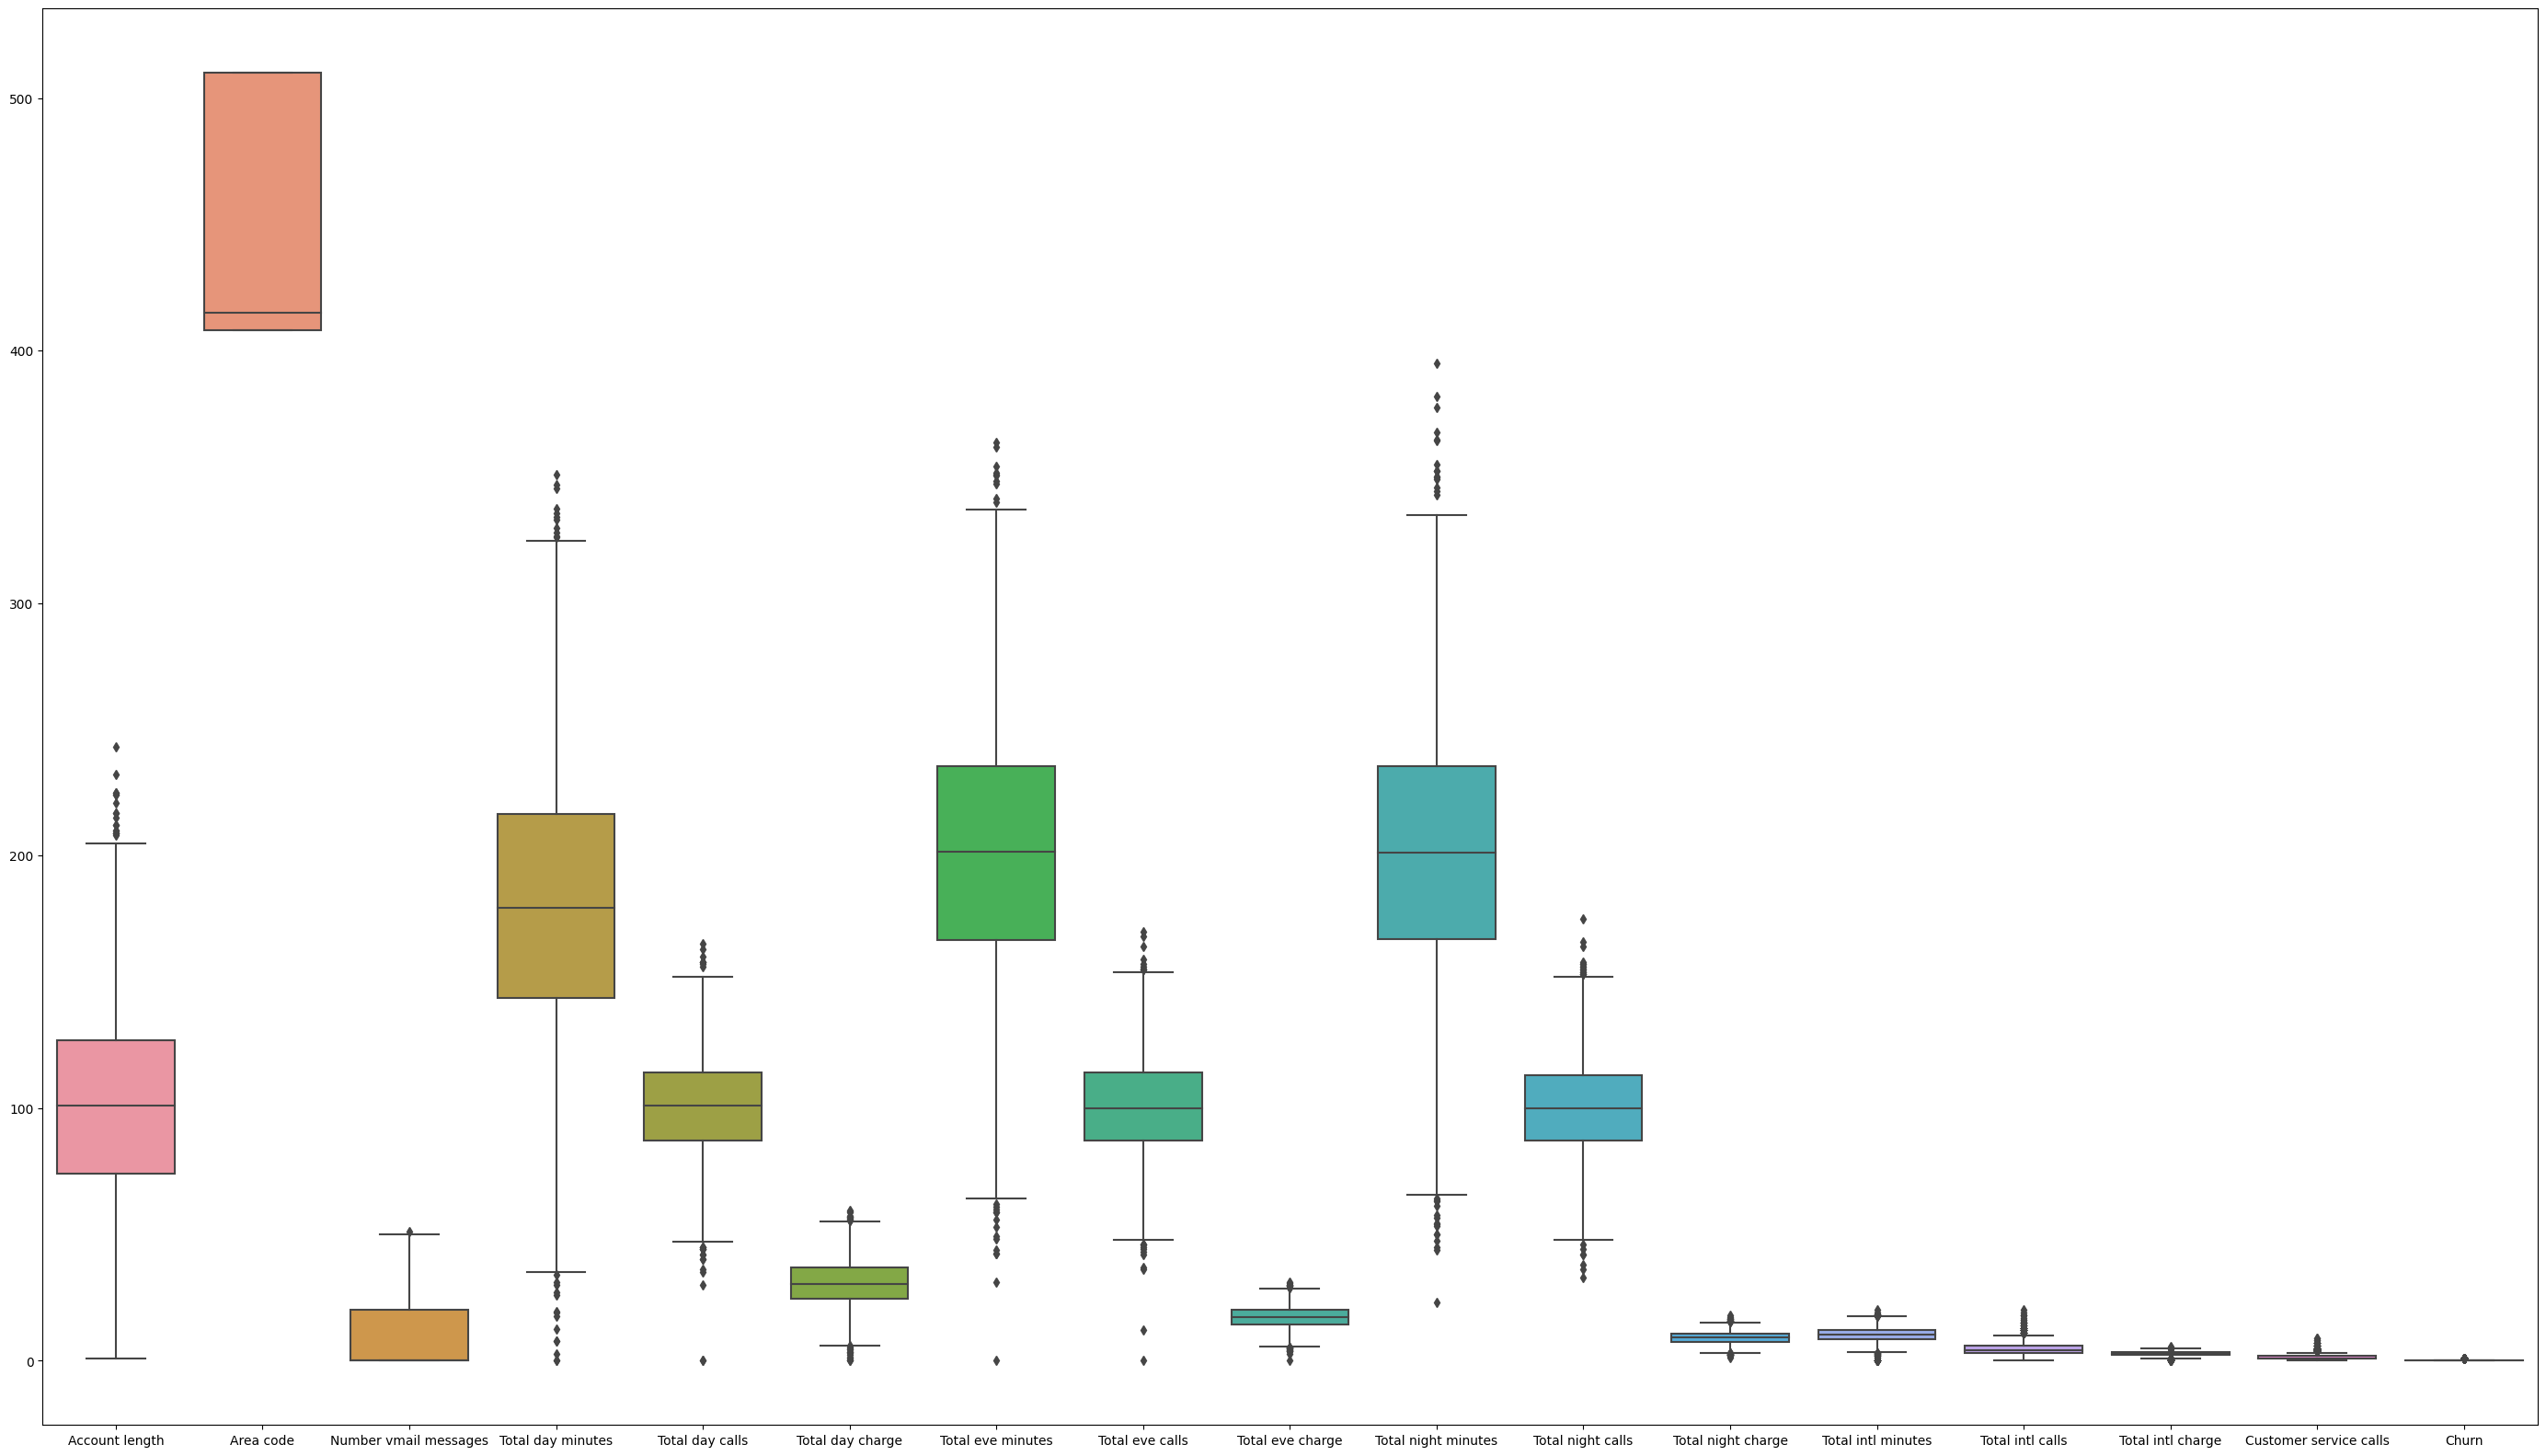

In [15]:
# Compute the Z-scores for each column
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Create a figure and axis
fig, ax = plt.subplots(figsize=(35, 20))

# Use seaborn to create a boxplot
sns.boxplot(data=data, ax=ax)

# Show the plot
plt.show()


In [16]:
cat_df = data.select_dtypes(include=['int64', 'float64'])
# cat_df

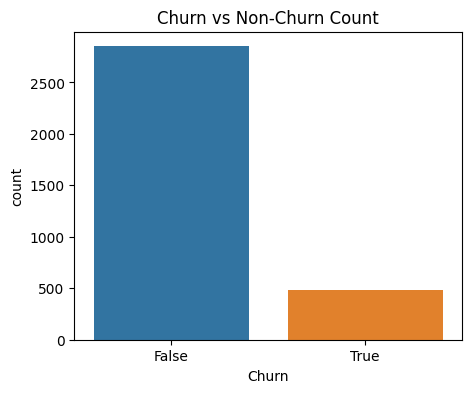

In [17]:
# target variable in this dataset is churn it has 2 categories False or True

# Count of churn in dataset
plt.figure(figsize=(5,4))
sns.countplot(x = data['Churn'])
plt.title("Churn vs Non-Churn Count")
plt.show()

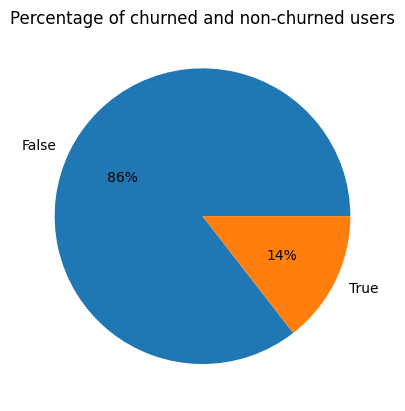

In [18]:
# Finding the percentage of Churner and Non Churner using Pie Chart

label = data['Churn'].value_counts().keys()
value = data['Churn'].value_counts().values

# list(zip(label, value))

plt.pie(value, labels= label, autopct='%.0f%%' )
plt.title('Percentage of churned and non-churned users')
plt.show()

##### Our target variable has two categories which include True and False values. 
* True = Customer will move or churn out. 
* False = Customer won’t move We can clearly see that our data is highly imbalanced. 
##### The occurrence of false is higher than True. There are 2850 (86%) customers who churn out and 483 (14%) customers retained.

##### Here churn count for True is less means few customer have stoppped using it.

In [19]:
# Display the Outliers in the data 

# Define a function that computes the Z-scores for a column
def compute_zscore(col):
    mean = col.mean()
    std = col.std()
    z_scores = (col - mean) / std
    return z_scores

# Compute the Z-scores for each column
df_z = cat_df.apply(compute_zscore)

# Print the Z-scores
# print(df_z)


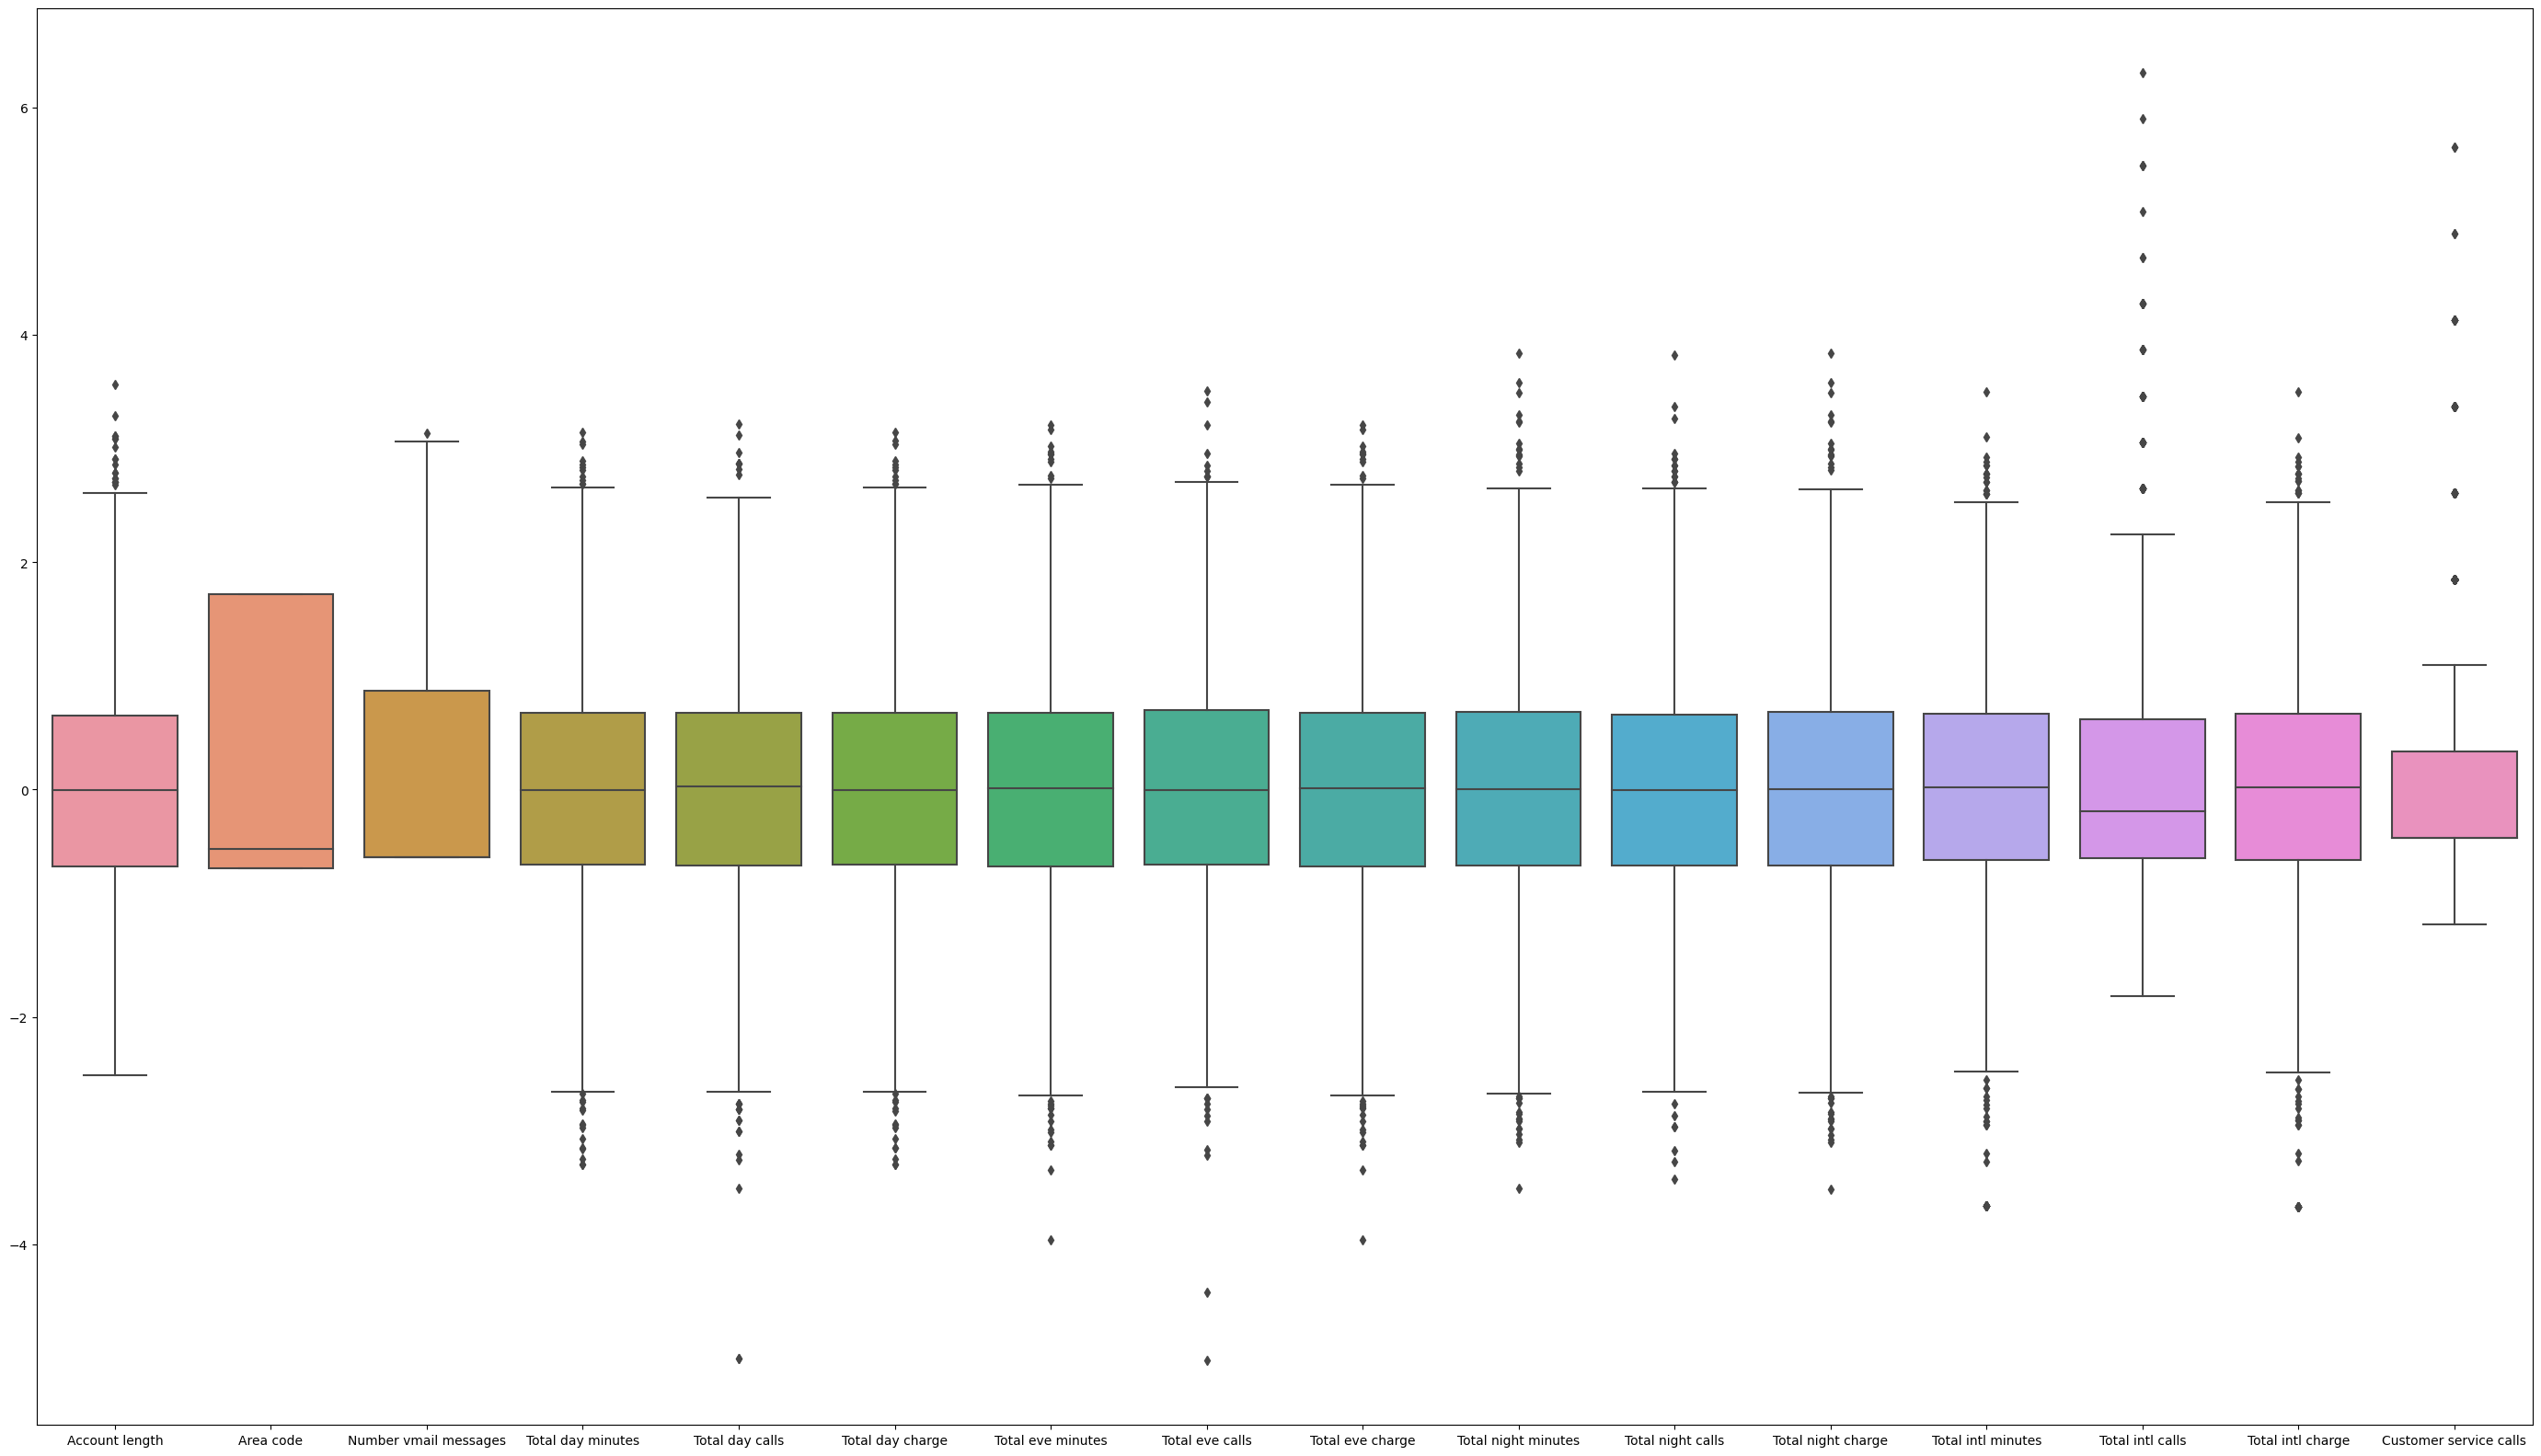

In [20]:
# Compute the Z-scores for each column
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# df_z = data.apply(zscore)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(35, 20))

# Use seaborn to create a boxplot
sns.boxplot(data=df_z, ax=ax)

# Show the plot
plt.show()


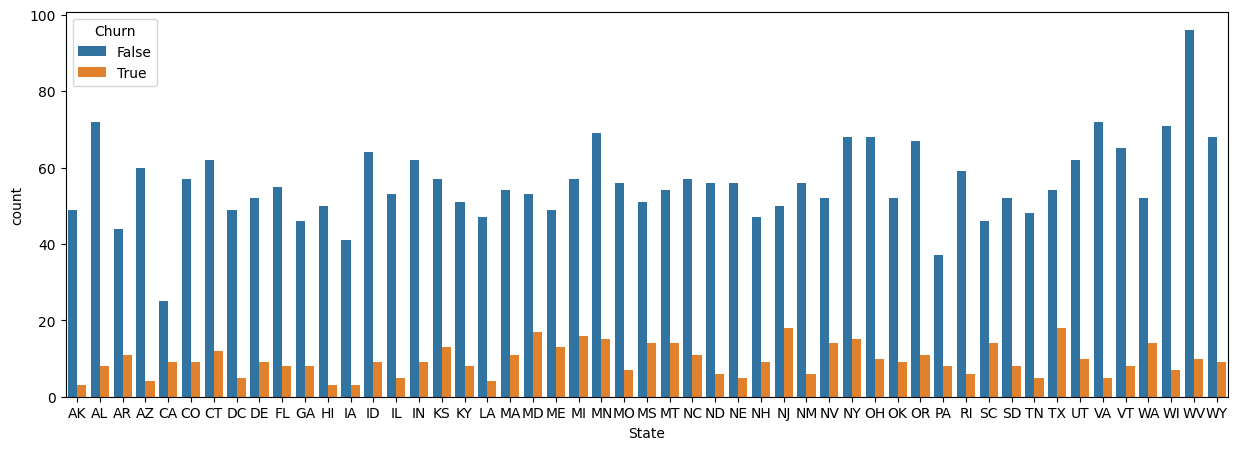

In [21]:
# State Wise Churn Analysis
# Q State with highest Churn

plt.figure(figsize=(15,5))
sns.countplot(x = data.State.sort_values(), hue = 'Churn',data = data)
plt.show()

In [22]:
#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    data.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

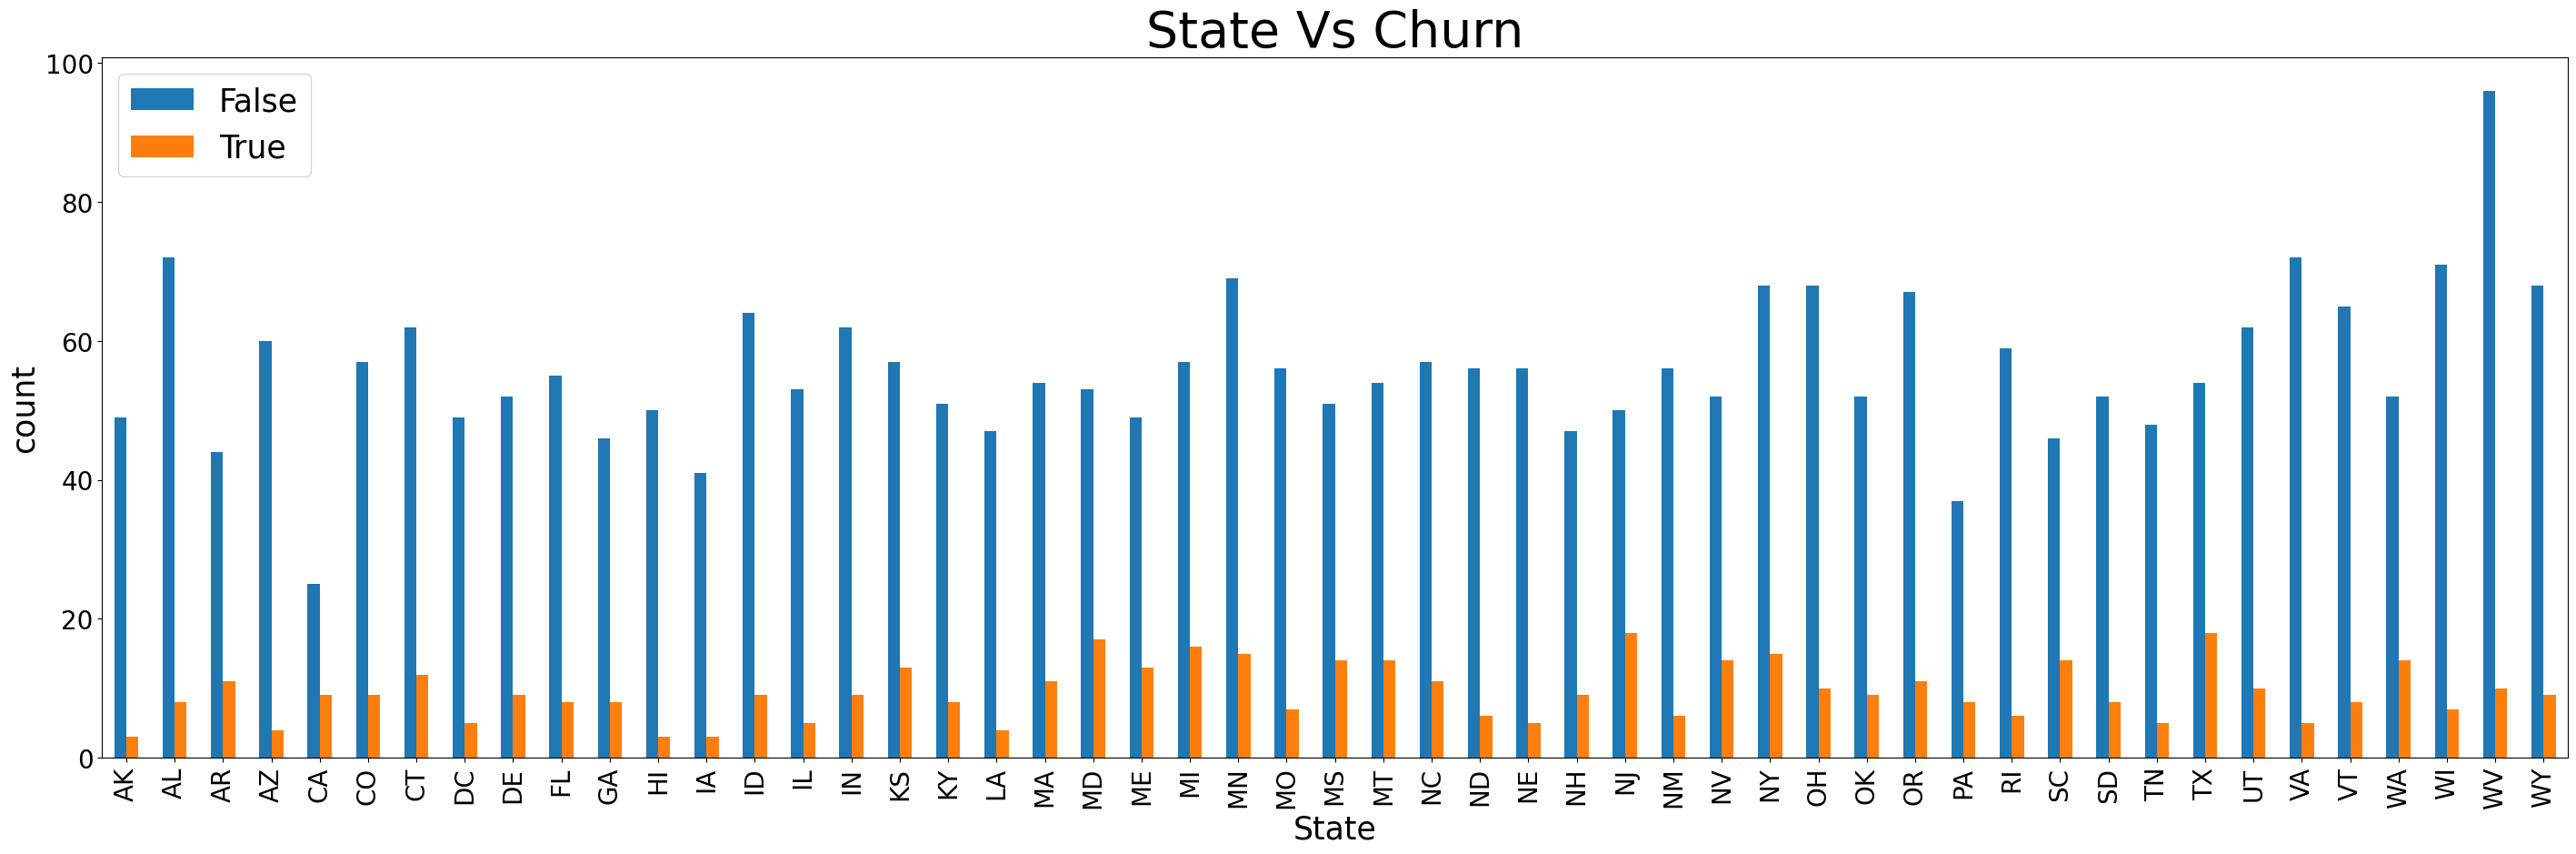

In [23]:
#State Wise Churning of customer
diff_bar('State','Churn')

Text(0.5, 0, 'States')

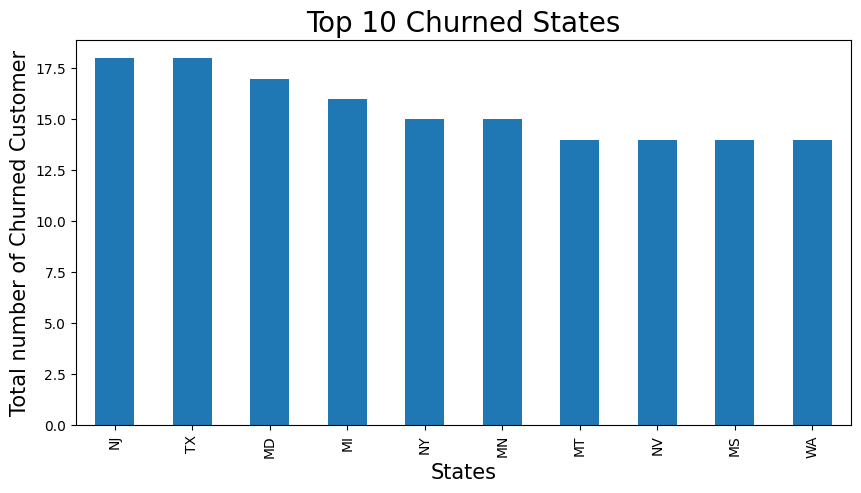

In [24]:
# Now comparing Target column with states

most_churned_state=data[data.Churn==True]
most_churned_state=most_churned_state['State'].value_counts()
most_churned_state.sort_index()
se=most_churned_state.head(10)
#plot bar
plt.subplots(figsize=(10,5))
se.plot.bar()

plt.title('Top 10 Churned States', size=20)
plt.ylabel('Total number of Churned Customer',size=15)
plt.xlabel('States',size=15)

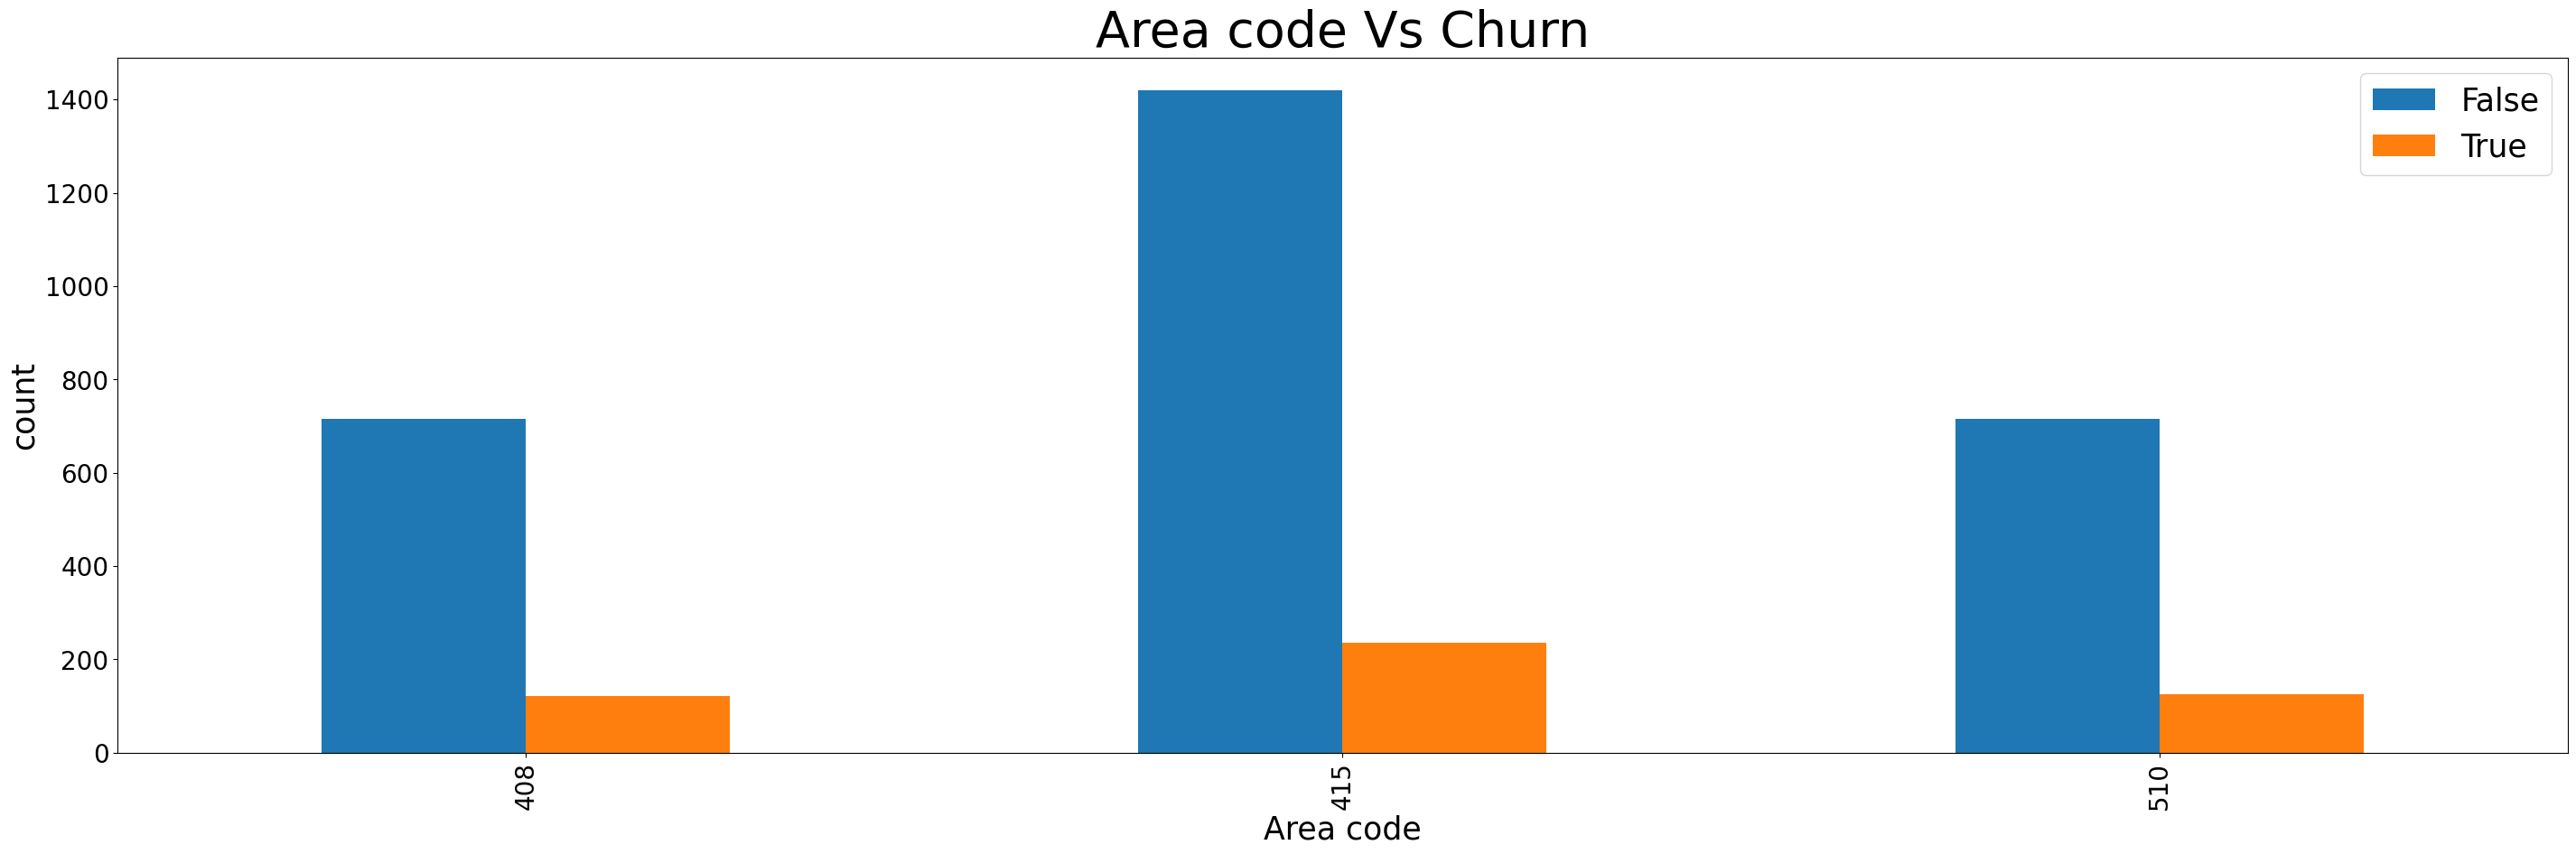

In [25]:
#area_code Wise Churning of customer
diff_bar('Area code','Churn')
# Most of the churned customers are from 415 area.

#### From here we can observe that MD, NJ and TX states have the highest Churn 

* According to my hypothesis, following would be the factors that should be implemented for stopping churn in these states:
1. In top three states New Jersey,Texas and Maryland we can definitely choose aggressive pricing strategies and network upgradation as well as improving voice quality of calls in these states.
2. We have to look out for our competitor in these states also as observation says that there may be strong competition.

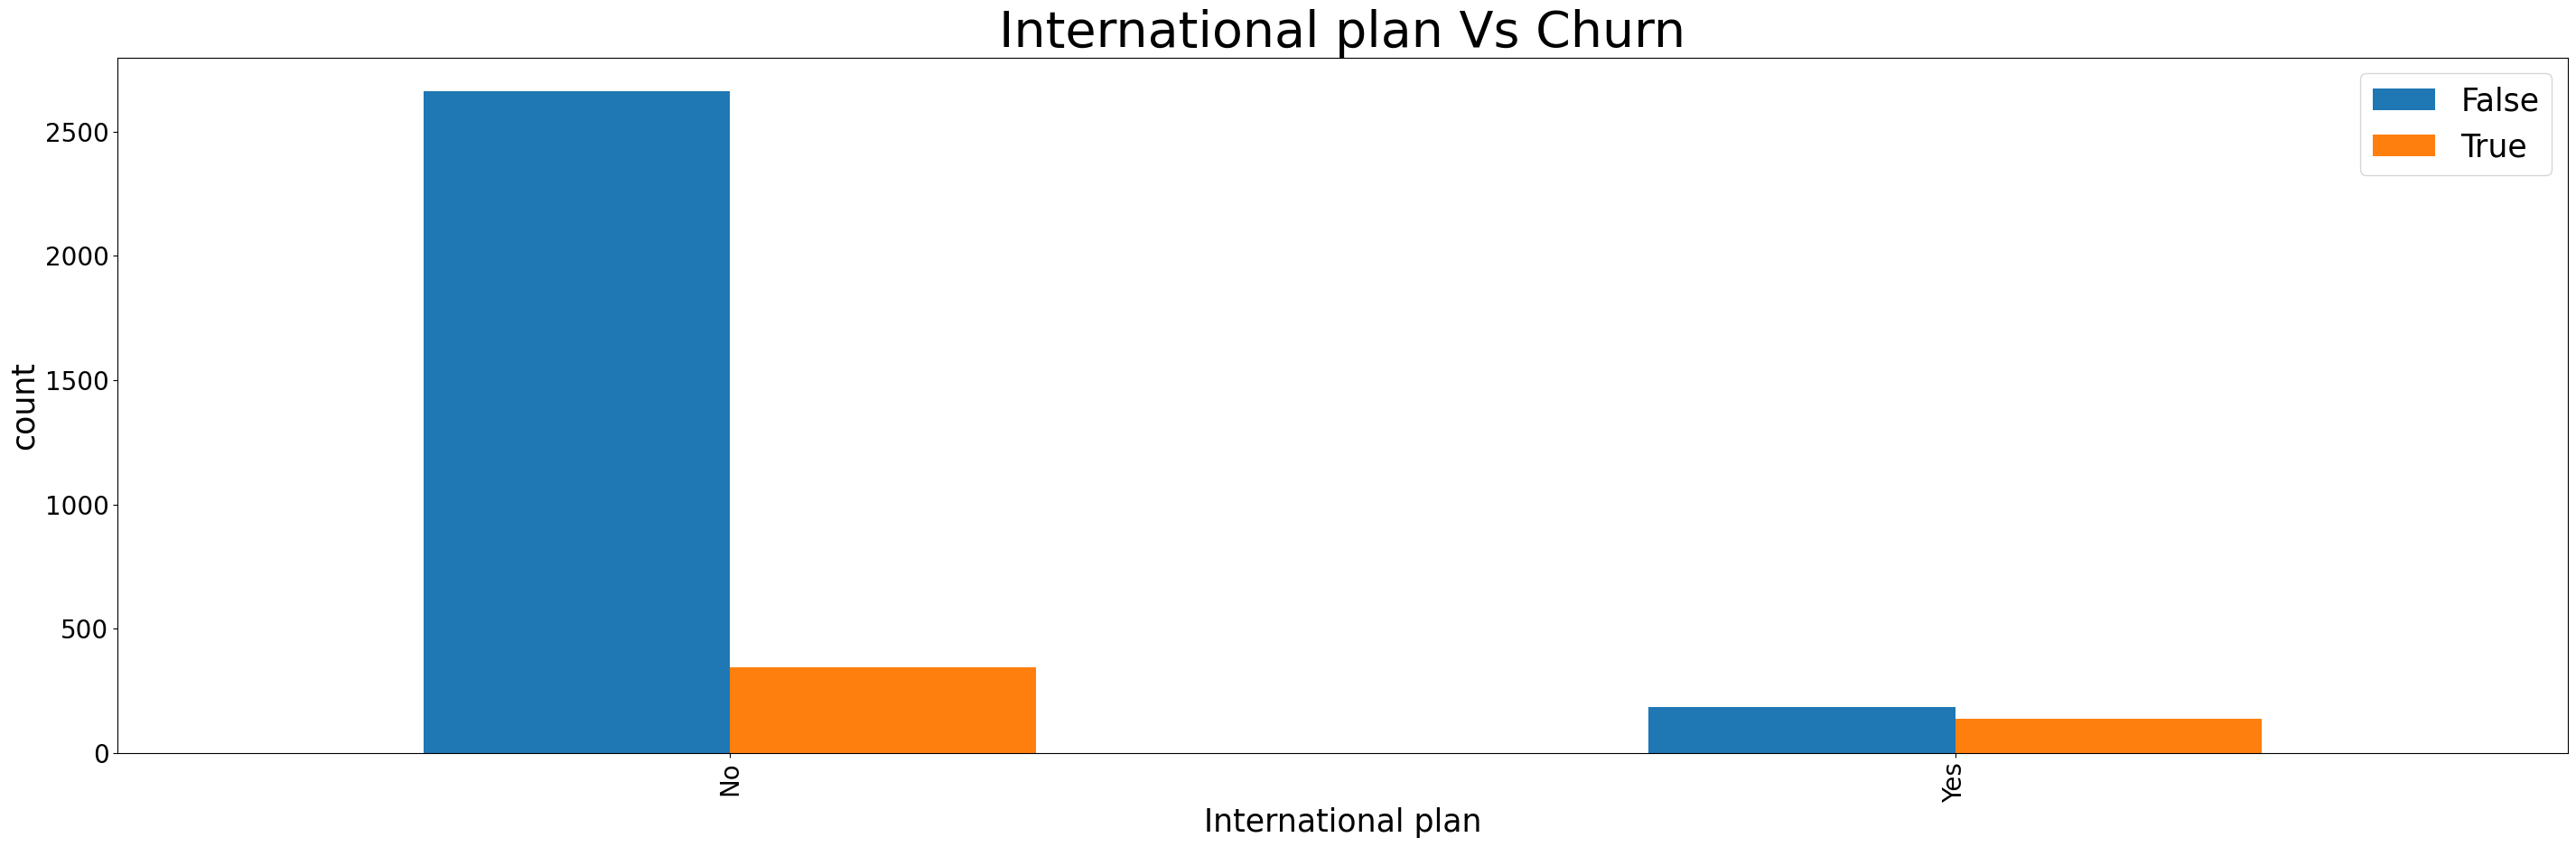

In [26]:
#International_Plan Wise Churning of customer
diff_bar('International plan','Churn')

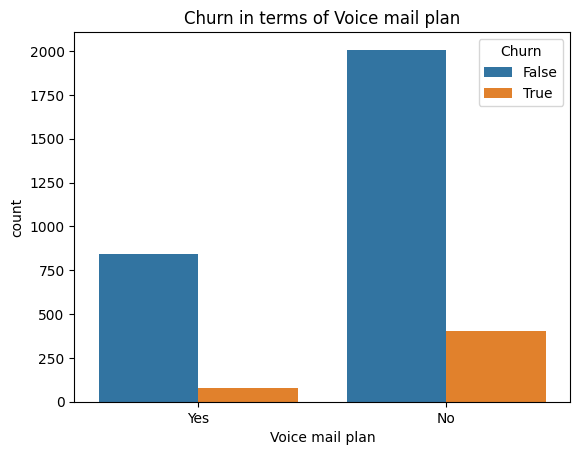

In [27]:
# churn distribution vs voice mail plan

sns.countplot(x = data['Voice mail plan'], hue = "Churn", data = data)
plt.title('Churn in terms of Voice mail plan')
plt.show()

Predictions:
From above plot we can see that the number of churned users who opt for voice mail plan is lesser than compare to those who did not opted for that.
so we can predict that our voice mail plan is doing good hence we can improve it further.

### Relation between Churn and Total day minutes

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

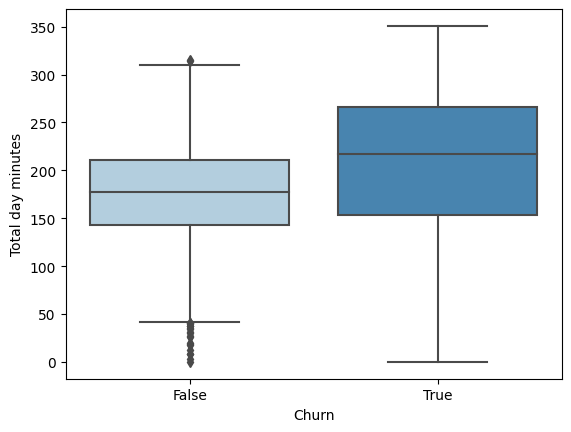

In [28]:
# Relation between Churn and Total day minutes
sns.boxplot(x="Churn",y="Total day minutes",data=data,palette = "Blues")

From above box-plot we can observe that users who are spending 225 minutes or more (approx. 4hrs) tend to switch to other operator.
Following would be the factors that should be implemented:
1. Network Disturbance during a Call.
2. Need to Upgrade or make smarter use of technologies like VoLTE for improvement of Voice Quality during calls.
3. Network Upgradation.

<AxesSubplot:xlabel='Churn', ylabel='Total day calls'>

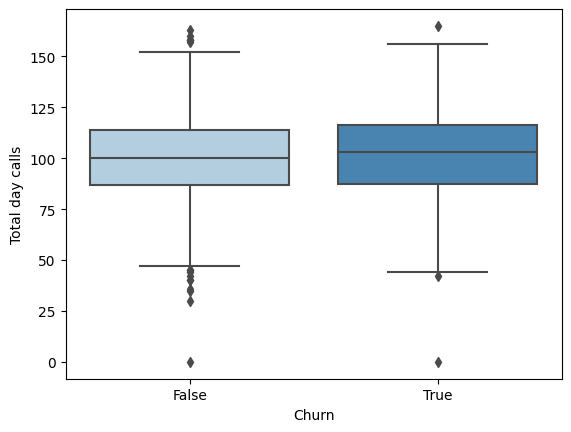

In [29]:
# Relation between Churn and Total day calls

# Relation between Churn and Total day calls
sns.boxplot(x="Churn",y="Total day calls",data=data,palette = "Blues")

##### From above plot we can observe that for the churned customer the median is slightly higher than 100 which indicates there maybe call drops which may lead to more calls in morning.

<AxesSubplot:xlabel='Churn', ylabel='Total day charge'>

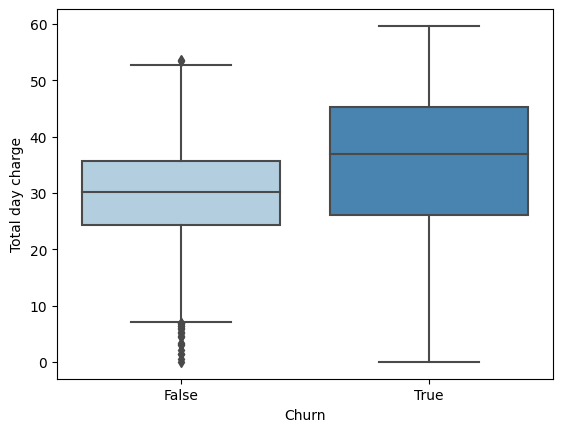

In [30]:
# Relation between Churn and Total day charge

# Relation between Churn and Total day charge
sns.boxplot(x="Churn",y="Total day charge",data=data,palette = "Blues")

From observing above boxplot we can clearly indicate a good strategy to be implemented. We can say that Customers having more day minutes spent on the network tend to leave it's subscription and from the above box-plot it clearly indicates that there is defect in the pricing strategy of the company.
According to my Hypothesis:
1. Strategy of pricing needs to be re-evaluated.
2. we can give discounts for the customers who have high spending of day minutes.

<AxesSubplot:xlabel='Churn', ylabel='Total eve minutes'>

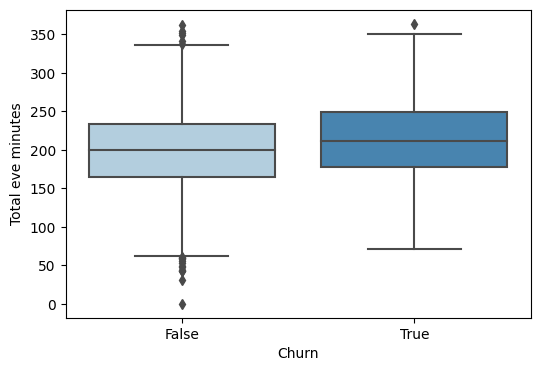

In [31]:
# Relation between Churn and Total eve minutes

# Relation between Churn and Total eve minutes
plt.subplots(figsize=(6,4))
sns.boxplot(x="Churn",y="Total eve minutes",data=data,palette = "Blues")

From above box-plot we can observe that users who are spending 210 minutes or more tend to switch to other operator.
Following would be the factors that should be implemented :
1. Network Disturbance during a Call.
2. Need to Upgrade or make smarter use of technologies like VoLTE for improvement of Voice Quality during calls.
3. Network Upgradation.

<AxesSubplot:xlabel='Churn', ylabel='Total eve calls'>

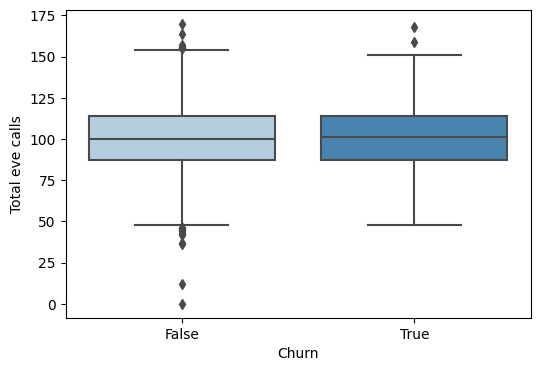

In [32]:
# Relation between Churn and Total eve calls

plt.subplots(figsize=(6,4))
sns.boxplot( x='Churn',y='Total eve calls',data=data,palette = "Blues")

##### From above box plot we can say that on an average a 100 eve calls are made which is a good indication for the company.

<AxesSubplot:xlabel='Churn', ylabel='Total eve charge'>

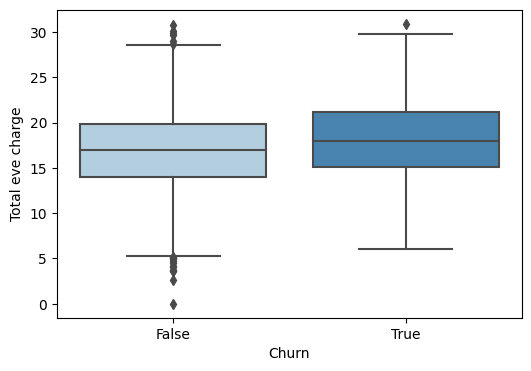

In [33]:

# Relation between Churn and Total eve charge
plt.subplots(figsize=(6,4))
sns.boxplot(x="Churn",y="Total eve charge",data=data, palette = "Blues")

##### From observing above boxplot we can say that pricing needs to be re-evaluated and we can give discounts for the customers who have high spending of eve minutes.

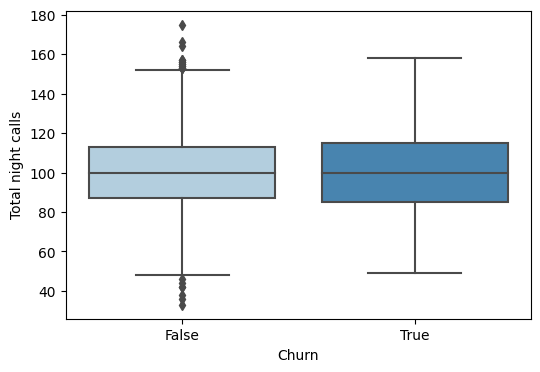

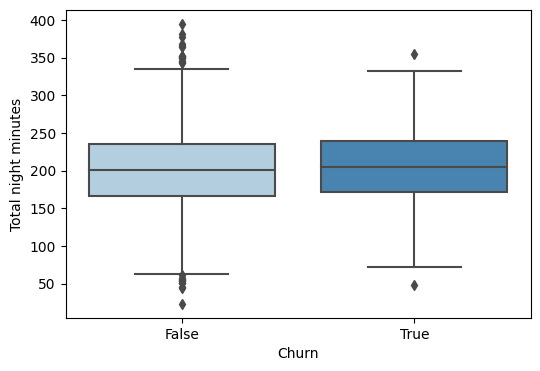

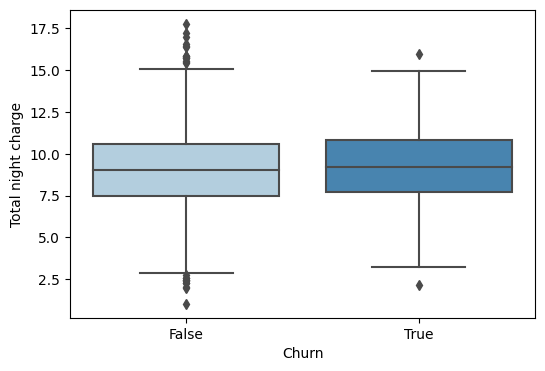

In [34]:
# Relation between Churn and Total night calls, night mins and night charge
for i, column in enumerate(data[["Total night calls","Total night minutes","Total night charge"]]):#using for loop to iterate throug all the columns of night telecom data
  plt.subplots(figsize=(6,4))
  sns.boxplot(x="Churn",y=column,data=data,palette = "Blues")

From observing boxplots of night minutes,night calls and night charges We can say that Customers having more night minutes spent on the network and most night charge tend to leave it's subscription and from the above box-plot it clearly indicates that there is defect in the pricing strategy of the company and we can give discounts for the customers who have high night call minutes spending.

<AxesSubplot:xlabel='Churn', ylabel='Total intl minutes'>

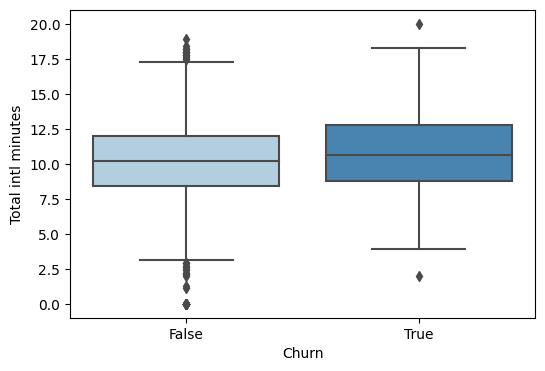

In [35]:
# Relation between Churn and Total intl minutes
#ploting box plot
plt.subplots(figsize=(6,4))
sns.boxplot(x="Churn",y="Total intl minutes",data=data,palette = "Blues")

##### Observations from the above boxplot indicates that Users who make the International Call tend to spend more minutes

<AxesSubplot:xlabel='Churn', ylabel='Total intl calls'>

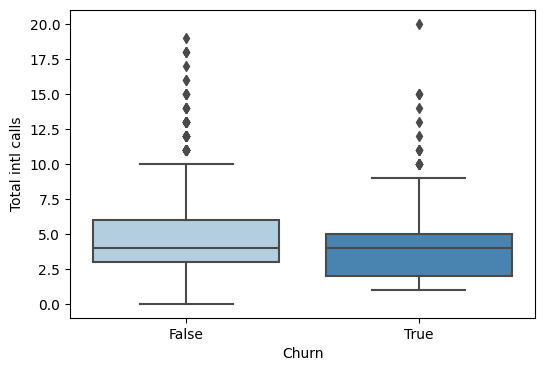

In [36]:
# Relation between Churn and Total intl calls
#ploting box plot for checking relation between churn and total intl calls
plt.subplots(figsize=(6,4))
sns.boxplot(x="Churn",y="Total intl calls",data=data,palette = "Blues")

##### Observations from the above boxplot indicates that churned users make lesser call than non-churned users.

<AxesSubplot:xlabel='Churn', ylabel='Total intl charge'>

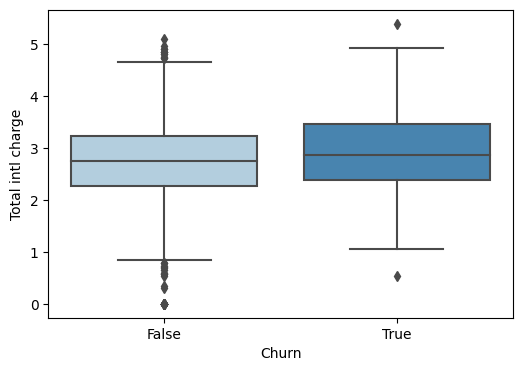

In [37]:
# Relation between Churn and Total intl charge

#ploting box plot for checking relation between churn and total intl charge
plt.subplots(figsize=(6,4))
sns.boxplot(x="Churn",y="Total intl charge",data=data,palette = "Blues")

From above box plot we can say that customerwho are churned having more intl calls

- According to my hypothesis,following would be the factors that should be implemented :
1. Implementing Different Pricing Strategy
2. Implementing international Calling Rate Optimization would need to lower churn rate.

Text(0, 0.5, 'Count')

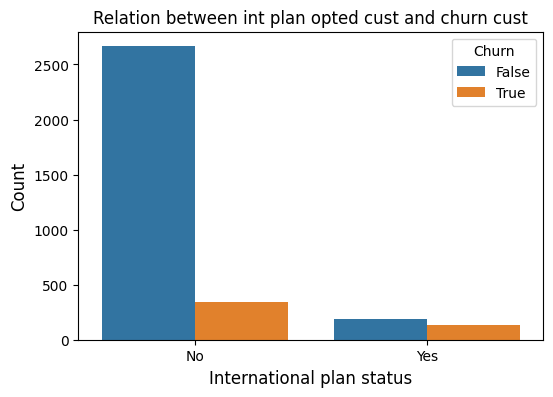

In [38]:
# Relation between Churn and International plan
##ploting count plot for checking relation between churn with international plan
plt.figure(figsize = (6,4))
sns.countplot(data =data, x ='International plan', hue = 'Churn')
plt.title('Relation between int plan opted cust and churn cust', fontsize = 12)
plt.xlabel('International plan status', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

The ratio between churned user who opted for international plan is 42%. It means there is some problem with the pricing or voice call quality for International plan opted users.
According to my hypothesis after monitoring the voice quality of international calls, following would be the factors that should be implemented :
1. Need to Upgrade or make smarter use of technologies like VoLTE for improvement of Voice Quality during calls.
2. Network Upgradation for international calls.

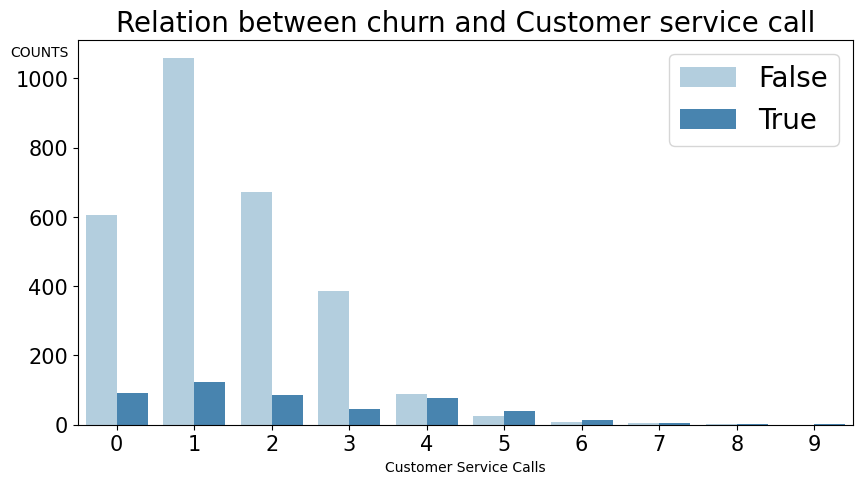

In [43]:
# Customer Calls
fig, axz = plt.subplots(figsize=(10,5))

axz = sns.countplot(x='Customer service calls', hue='Churn', data=data, palette='Blues')

axz.set_title('Relation between churn and Customer service call', fontsize=20)
axz.set_ylabel('COUNTS', rotation=0, labelpad=50,size=10)
axz.set_xlabel('Customer Service Calls', size=10)
axz.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

After observing the above plot we can say that some customers are lazy and hence without resolving the issue they have jumped to other network operator,while the customers who have called once also have high churn rate indicating their issue was not solved in first attempt.
According to my hypothesis,following would be the factors that should be implemented :
1. We have to promote our customer services.
2. Strengthening the customer service department can be helpful also.
3. we can take Feedback from customer who called customer services.

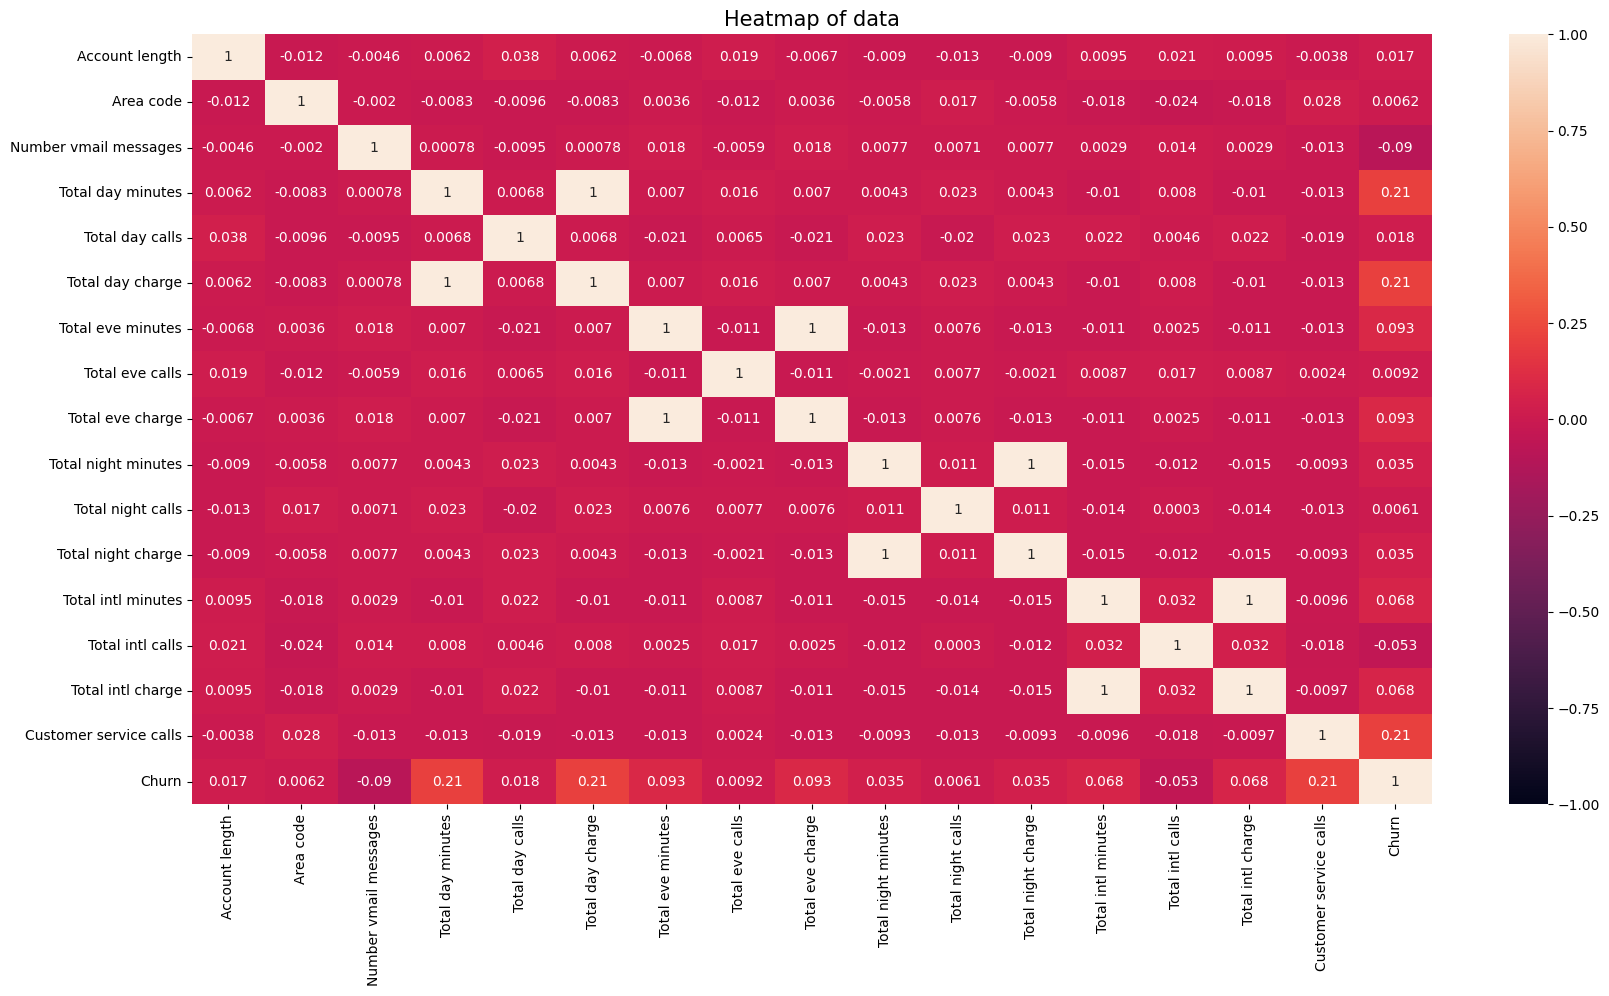

In [44]:
# Checking correlation of all the features in our dataset
#checking correlation with all columns using heat map
corrmat = data.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corrmat, vmin=-1,annot = True)
plt.title("Heatmap of data",fontsize= 15)
plt.show()

we can observe from heat map all the charge, mins, calls columns of day,eve,night and each day total are highly correlated with each other
customer service calls , total mins and charge of each day is highly correlated to churn feature

In this project ,we tried to analyze customer churn. First we did inspection of dataset on a basic level.We looked for missing values and check the outlier.
Then we used the matplotlib and seaborn to do Exploratory Data Analysis on sample data by plotting different graphs like count plot, pie chart,lmplot,barplot,boxplot, subplot and heat map from this we got useful insights like: customer having more daily charge will be more chances of churn, states like New Jersey,Texas and Maryland have higher churn rate, customer having international plan have more churn rate, customer having less customer service call have more churn rate and 14% percentage of customer who has been churned
Here is our suggestion to prevent churn :
1. Upgrading network to improve services for long duration users.
2. Improving Pricing Strategies.
3. Optimizing and Updating Internationall Call Rates.
4. Implmenting a better network infrastructure in New Jersey,Texas and Maryland Areas where there is more Churn Rate.
6. Improvement in the customer service can be done to reduce the number of calls which cause the churn
7. Decreasing the prices as the talk-time increases can be an effective way to reduce the churn.
Further more Improvement we can suggest and discuss more strategies to the company by collecting other data and through a domain expert